In [29]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])

one_hot_encoded_data.dtypes

Age                                  int64
FraudFound_P                         int64
Days_Policy_Accident               float64
Days_Policy_Claim                  float64
AgeOfVehicle                       float64
Sex_Female                           uint8
Sex_Male                             uint8
MaritalStatus_Divorced               uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
MaritalStatus_Widow                  uint8
Fault_Policy Holder                  uint8
Fault_Third Party                    uint8
PolicyType_Sedan - All Perils        uint8
PolicyType_Sedan - Collision         uint8
PolicyType_Sedan - Liability         uint8
PolicyType_Sport - All Perils        uint8
PolicyType_Sport - Collision         uint8
PolicyType_Sport - Liability         uint8
PolicyType_Utility - All Perils      uint8
PolicyType_Utility - Collision       uint8
PolicyType_Utility - Liability       uint8
VehicleCategory_Sedan                uint8
VehicleCate

classes are:  ['0', '1']
ACCURACY OF THE MODEL:  0.9241245136186771
Accuracy: 0.9241245136186771
Confusion Matrix is 
[[4253   95]
 [ 256   22]]


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4348
           1       0.19      0.08      0.11       278

    accuracy                           0.92      4626
   macro avg       0.57      0.53      0.54      4626
weighted avg       0.90      0.92      0.91      4626





C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[4253   95]
 [ 256   22]]


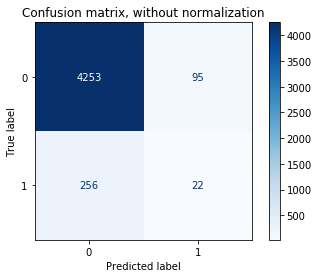

In [30]:
# Applying KNN for Predict Frauds in Vehicle Insurance Claim
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


x = one_hot_encoded_data.drop("FraudFound_P", axis=1).values
y = one_hot_encoded_data["FraudFound_P"].values

class_names = ["0", "1"]
print("classes are: ", class_names)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()





In [31]:
from sklearn.metrics import mean_squared_error
# make predictions on the training and testing data
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# calculate the mean squared error for the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# print the mean squared error values for both the training and testing data
print("Train MSE: ", train_mse)
print("Test MSE: ", test_mse)

# check if the model is overfitting
if train_mse < test_mse:
    print("The model is overfitting")
else:
    print("The model is not overfitting")

Train MSE:  0.057346674078191585
Test MSE:  0.07587548638132295
The model is overfitting


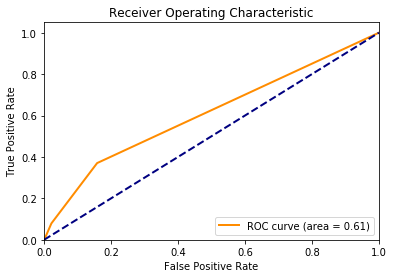

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = knn.predict_proba(X_test)[::,1]
# assume y_true and y_pred are your true labels and predicted probabilities, respectively
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

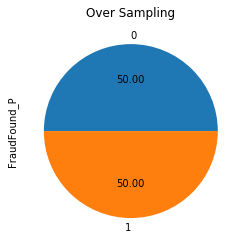

In [33]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])


x = one_hot_encoded_data.drop("FraudFound_P", axis=1)
y = one_hot_encoded_data["FraudFound_P"]


ros = RandomOverSampler(sampling_strategy = "not majority")
x_res, y_res = ros.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_=ax.set_title("Over Sampling")



classes are:  ['0', '1']
ACCURACY OF THE MODEL:  0.8369927577882516
Accuracy: 0.8369927577882516
Confusion Matrix is 
[[3244 1141]
 [ 277 4037]]


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      4385
           1       0.78      0.94      0.85      4314

    accuracy                           0.84      8699
   macro avg       0.85      0.84      0.84      8699
weighted avg       0.85      0.84      0.84      8699



Confusion matrix, without normalization
[[3244 1141]
 [ 277 4037]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


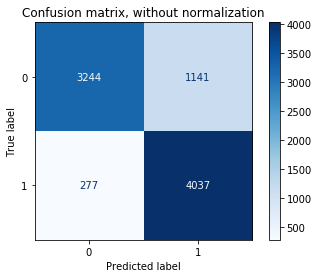

In [34]:
# Applying Rndom Forest for Predict Frauds in Vehicle Insurance Claim
# https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix




class_names = ["0", "1"]
print("classes are: ", class_names)


X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.30)

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [35]:
from sklearn.metrics import mean_squared_error
# make predictions on the training and testing data
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# calculate the mean squared error for the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# print the mean squared error values for both the training and testing data
print("Train MSE: ", train_mse)
print("Test MSE: ", test_mse)

# check if the model is overfitting
if train_mse < test_mse:
    print("The model is overfitting")
else:
    print("The model is not overfitting")

Train MSE:  0.15659029317565903
Test MSE:  0.16300724221174848
The model is overfitting


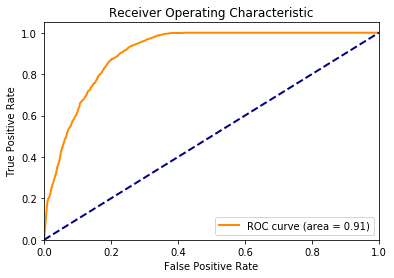

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = clf.predict_proba(X_test)[::,1]
# assume y_true and y_pred are your true labels and predicted probabilities, respectively
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

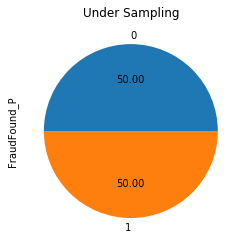

In [37]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

dataset = pd.read_csv("fraud_oracle.csv")

#removing unrelated variables from the data set
updated_ds = dataset.drop(["Month","WeekOfMonth","DayOfWeek", "Make", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed", 
                   "RepNumber", "Deductible", "AgeOfPolicyHolder","PastNumberOfClaims","PolicyNumber", "AddressChange_Claim","NumberOfCars","Year"],axis =1)

#drop fetures that identified as unimportant by feature extraction method using R-Studio

updated_ds_new = updated_ds.drop(["AccidentArea", "AgentType", "DriverRating", "NumberOfSuppliments","PoliceReportFiled","VehiclePrice"],axis =1)


# For Days_Policy_Accident it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'more than 30', 'Days_Policy_Accident'] = '31'

updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == 'none', 'Days_Policy_Accident'] = '0'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '8 to 15', 'Days_Policy_Accident'] = '11.5'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '15 to 30', 'Days_Policy_Accident'] = '22.5'

# mean of range 1 t0 7 ->  1+2+3+4+5+6+7/7 = 4 
updated_ds_new.loc[updated_ds_new['Days_Policy_Accident'] == '1 to 7', 'Days_Policy_Accident'] = '4'


# For Days_Policy_Claim it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'more than 30', 'Days_Policy_Claim'] = '31'

# mean of range 15 to 30 ->  15+16+17+18+19+20+21+22+23+24+25+26+27+28+29+30/ 16 = 22.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '15 to 30', 'Days_Policy_Claim'] = '22.5'

# mean of range 8 t0 15 -> 8+9+10+11+12+13+14+15 / 8 = 11.5 
updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == '8 to 15', 'Days_Policy_Claim'] = '11.5'

updated_ds_new.loc[updated_ds_new['Days_Policy_Claim'] == 'none', 'Days_Policy_Claim'] = '0'

# For AgeOfVehicle it contains range of values here change this column into get the mean of the range.

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '7 years', 'AgeOfVehicle'] = '7'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'more than 7', 'AgeOfVehicle'] = '8'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '6 years', 'AgeOfVehicle'] = '6'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '5 years', 'AgeOfVehicle'] = '5'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == 'new', 'AgeOfVehicle'] = '0'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '4 years', 'AgeOfVehicle'] = '4'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '3 years', 'AgeOfVehicle'] = '3'

updated_ds_new.loc[updated_ds_new['AgeOfVehicle'] == '2 years', 'AgeOfVehicle'] = '2'

# changing datatypes of the dataset as per the above transformations
updated_ds_new['Days_Policy_Accident'] = updated_ds_new['Days_Policy_Accident'].astype('float')
updated_ds_new['Days_Policy_Claim'] = updated_ds_new['Days_Policy_Claim'].astype('float')
updated_ds_new['AgeOfVehicle'] = updated_ds_new['AgeOfVehicle'].astype('float')

updated_ds_new.dtypes

# perform OHE for categorical data 
one_hot_encoded_data = pd.get_dummies(updated_ds_new, columns = ['Sex', 'MaritalStatus','Fault','PolicyType', 'VehicleCategory','WitnessPresent','BasePolicy'])


x = one_hot_encoded_data.drop("FraudFound_P", axis=1)
y = one_hot_encoded_data["FraudFound_P"]


ros = RandomUnderSampler(sampling_strategy = 1)
x_res, y_res = ros.fit_resample(x,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_=ax.set_title("Under Sampling")



classes are:  ['0', '1']
Accuracy: 0.7292418772563177
Confusion Matrix is 
[[148 129]
 [ 21 256]]


              precision    recall  f1-score   support

           0       0.88      0.53      0.66       277
           1       0.66      0.92      0.77       277

    accuracy                           0.73       554
   macro avg       0.77      0.73      0.72       554
weighted avg       0.77      0.73      0.72       554



Confusion matrix, without normalization
[[148 129]
 [ 21 256]]


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


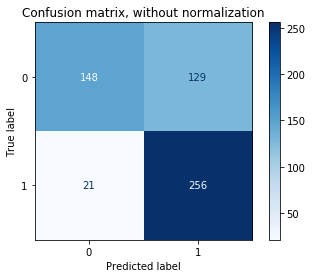

In [38]:
# Applying logistic regression for Predict Frauds in Vehicle Insurance Claim
# https://www.geeksforgeeks.org/ml-logistic-regression-using-python/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

X = x_res.values
Y = y_res.values


class_names = ["0", "1"]
print("classes are: ", class_names)

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.30, random_state=0)


sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


y_pred = classifier.predict(xtest)



# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest,y_pred))

print("Confusion Matrix is ")
print(confusion_matrix(ytest,y_pred))
print("\n")
print(classification_report(ytest,y_pred))
print("\n")


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, xtest, ytest,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()




In [39]:
from sklearn.metrics import mean_squared_error
# make predictions on the training and testing data
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

# calculate the mean squared error for the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# print the mean squared error values for both the training and testing data
print("Train MSE: ", train_mse)
print("Test MSE: ", test_mse)

# check if the model is overfitting
if train_mse < test_mse:
    print("The model is overfitting")
else:
    print("The model is not overfitting")

Train MSE:  0.49002217294900224
Test MSE:  0.48453845269571216
The model is not overfitting


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


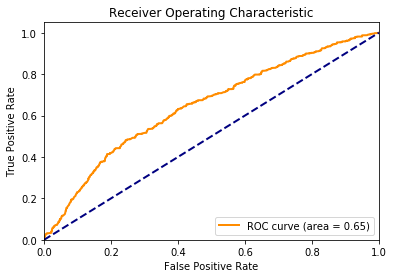

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classifier.predict_proba(X_test)[::,1]
# assume y_true and y_pred are your true labels and predicted probabilities, respectively
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

# calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()